### Try-it 8.1: The "Best" Model

This module was all about regression and using Python's scikitlearn library to build regression models.  Below, a dataset related to real estate prices in California is given. While many of the assignments you have built and evaluated different models, it is important to spend some time interpreting the resulting "best" model.  


Your goal is to build a regression model to predict the price of a house in California.  After doing so, you are to *interpret* the model.  There are many strategies for doing so, including some built in methods from scikitlearn.  One example is `permutation_importance`.  Permutation feature importance is a strategy for inspecting a model and its features importance.  

Take a look at the user guide for `permutation_importance` [here](https://scikit-learn.org/stable/modules/permutation_importance.html).  Use  the `sklearn.inspection` modules implementation of `permutation_importance` to investigate the importance of different features to your regression models.  Share these results on the discussion board.

In [1]:
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import itertools
import plotly.express as px
import seaborn as sns

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cali = pd.read_csv('data/housing.csv')
cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# First, let's drop the NaNs in the dataset.
cali = cali.dropna()

In [5]:
# Make a 3-cluster identification
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, random_state=69).fit(cali[['latitude', 'longitude']])

cali['Cluster'] = kmeans.labels_
px.scatter(cali, x='latitude', y='longitude', color='Cluster')

In [6]:
# Next let's encode the ocean proximity feature and the clustering.
tf = make_column_transformer(
    (OneHotEncoder(), ['ocean_proximity', 'Cluster']), remainder='passthrough'
)

cali = pd.DataFrame(tf.fit_transform(cali), columns = tf.get_feature_names_out())
cali.corr()

,onehotencoder__ocean_proximity_<1H OCEAN,onehotencoder__ocean_proximity_INLAND,onehotencoder__ocean_proximity_ISLAND,onehotencoder__ocean_proximity_NEAR BAY,onehotencoder__ocean_proximity_NEAR OCEAN,onehotencoder__Cluster_0,onehotencoder__Cluster_1,onehotencoder__Cluster_2,onehotencoder__Cluster_3,onehotencoder__Cluster_4,...,onehotencoder__Cluster_6,remainder__longitude,remainder__latitude,remainder__housing_median_age,remainder__total_rooms,remainder__total_bedrooms,remainder__population,remainder__households,remainder__median_income,remainder__median_house_value
onehotencoder__ocean_proximity_<1H OCEAN,1.000000,-0.607778,-0.013928,-0.314721,-0.342018,-0.113868,-0.162254,0.566649,-0.107871,-0.204491,...,-0.308289,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614
onehotencoder__ocean_proximity_INLAND,-0.607778,1.000000,-0.010681,-0.241356,-0.262289,-0.063674,-0.271525,-0.254007,0.143736,0.340541,...,0.507240,-0.055337,0.351084,-0.236968,0.026477,-0.006463,-0.019602,-0.038265,-0.237536,-0.484787
onehotencoder__ocean_proximity_ISLAND,-0.013928,-0.010681,1.000000,-0.005531,-0.006011,-0.005312,-0.008666,0.018394,-0.002901,-0.003732,...,-0.005418,0.009501,-0.016662,0.017105,-0.007603,-0.004361,-0.010451,-0.009119,-0.009281,0.023525
onehotencoder__ocean_proximity_NEAR BAY,-0.314721,-0.241356,-0.005531,1.000000,-0.135819,-0.120030,0.638259,-0.300689,-0.065543,-0.084327,...,-0.122425,-0.474714,0.358785,0.256149,-0.023647,-0.019873,-0.061480,-0.011280,0.056677,0.160526
onehotencoder__ocean_proximity_NEAR OCEAN,-0.342018,-0.262289,-0.006011,-0.135819,1.000000,0.370413,0.019671,-0.205912,0.021753,-0.090993,...,-0.133043,0.046185,-0.161342,0.020797,-0.008674,0.000679,-0.023498,0.002106,0.027351,0.140378
onehotencoder__Cluster_0,-0.113868,-0.063674,-0.005312,-0.120030,0.370413,1.000000,-0.188059,-0.288783,-0.062948,-0.080988,...,-0.117577,0.447133,-0.411103,-0.174339,0.070687,0.073868,0.033066,0.050044,-0.055486,-0.087950
onehotencoder__Cluster_1,-0.162254,-0.271525,-0.008666,0.638259,0.019671,-0.188059,1.000000,-0.471108,-0.102690,-0.132120,...,-0.191811,-0.718441,0.527849,0.155810,0.007299,-0.013524,-0.037026,0.001048,0.173309,0.266778
onehotencoder__Cluster_2,0.566649,-0.254007,0.018394,-0.300689,-0.205912,-0.288783,-0.471108,1.000000,-0.157691,-0.202883,...,-0.294544,0.630672,-0.648532,0.115346,-0.004190,0.028291,0.084261,0.042376,0.098012,0.168618
onehotencoder__Cluster_3,-0.107871,0.143736,-0.002901,-0.065543,0.021753,-0.062948,-0.102690,-0.157691,1.000000,-0.044224,...,-0.064204,-0.294559,0.394737,-0.059805,-0.040284,-0.040986,-0.067481,-0.051798,-0.137079,-0.184228
onehotencoder__Cluster_4,-0.204491,0.340541,-0.003732,-0.084327,-0.090993,-0.080988,-0.132120,-0.202883,-0.044224,1.000000,...,-0.082603,-0.017483,0.116428,-0.082223,-0.053389,-0.059385,-0.042835,-0.063182,-0.134831,-0.249132


In [7]:
"""
Picking the best attributes.
- Drop long/lat
- Drop the rest for low correspondence (california house prices are very geographically-centered, then)
"""

cali = cali.drop('remainder__longitude', axis=1)
cali = cali.drop('remainder__latitude', axis=1)
cali = cali.drop('onehotencoder__ocean_proximity_ISLAND', axis=1)
cali = cali.drop('remainder__total_bedrooms', axis=1)
cali = cali.drop('remainder__population', axis=1)
cali = cali.drop('remainder__households', axis=1)
cali = cali.drop('onehotencoder__Cluster_0', axis=1)
cali = cali.drop('onehotencoder__Cluster_5', axis=1)

cali.columns

Index(['onehotencoder__ocean_proximity_<1H OCEAN',
       'onehotencoder__ocean_proximity_INLAND',
       'onehotencoder__ocean_proximity_NEAR BAY',
       'onehotencoder__ocean_proximity_NEAR OCEAN', 'onehotencoder__Cluster_1',
       'onehotencoder__Cluster_2', 'onehotencoder__Cluster_3',
       'onehotencoder__Cluster_4', 'onehotencoder__Cluster_6',
       'remainder__housing_median_age', 'remainder__total_rooms',
       'remainder__median_income', 'remainder__median_house_value'],
      dtype='object')

In [10]:

# Generate training & test datasets. Also generate a validation set which subsets the test set, to evaluate the models independently.
X_train, X_test, y_train, y_test = train_test_split(cali.drop('remainder__median_house_value', axis=1), cali['remainder__median_house_value'], test_size=0.4, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.25, random_state=42)

print(cali.shape)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(20433, 13)
(12259, 12)
(6130, 12)
(2044, 12)


In [12]:
train_score = []
test_score = []
val_score = []
pips=[]
for n in range(1,6):
    #print('Degree: %s'%n)
    p = Pipeline([
        ('tf', make_column_transformer(
            (PolynomialFeatures(degree=n, include_bias = False), ['remainder__housing_median_age', 'remainder__total_rooms', 'remainder__median_income'], ),
            remainder='passthrough')
        ),
        ('lr', LinearRegression())
    ])
    p.fit(X_train, y_train)
    train_score.append(mean_squared_error(p.predict(X_train), y_train))
    test_score.append(mean_squared_error(p.predict(X_test), y_test))
    val_score.append(mean_squared_error(p.predict(X_val), y_val))
    pips.append(p)

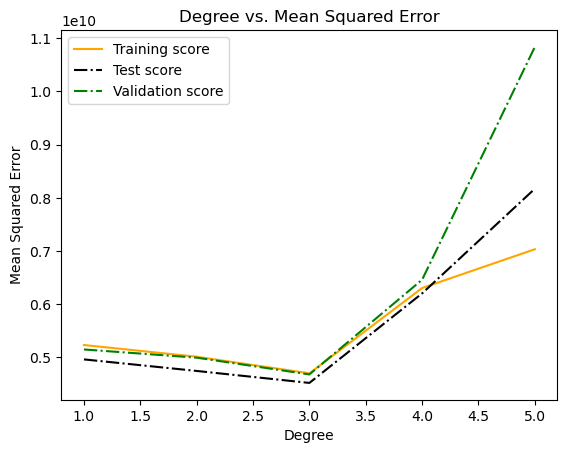

In [13]:
fig, ax = plt.subplots()

ax.set_title('Degree vs. Mean Squared Error')

ax.plot(np.arange(1,6), train_score, label = 'Training score', color='orange')
ax.plot(np.arange(1,6), test_score, '-.', label = 'Test score', color='black')
ax.plot(np.arange(1,6), val_score, '-.', label = 'Validation score', color = 'green')

ax.set_xlabel('Degree')
ax.set_ylabel('Mean Squared Error')
ax.legend()

In [20]:
p = pips[2]
p.score(X_test, y_test)

0.6535940252237322

In [22]:
r = permutation_importance(p, X_val, y_val, n_repeats=30, random_state=0)

In [24]:
for i,ft in enumerate(X_train.columns):
    print('%s .    %.2e +- %.2e'%(ft, r['importances_mean'][i], r['importances_std'][i]))

onehotencoder__ocean_proximity_<1H OCEAN .    4.88e-15 +- 6.43e-16
onehotencoder__ocean_proximity_INLAND .    1.20e-14 +- 1.90e-15
onehotencoder__ocean_proximity_NEAR BAY .    8.29e-16 +- 1.85e-16
onehotencoder__ocean_proximity_NEAR OCEAN .    -2.78e-16 +- 5.55e-17
onehotencoder__Cluster_1 .    3.64e-15 +- 6.26e-16
onehotencoder__Cluster_2 .    4.03e-16 +- 1.66e-16
onehotencoder__Cluster_3 .    1.89e-16 +- 5.09e-17
onehotencoder__Cluster_4 .    7.29e-16 +- 8.92e-17
onehotencoder__Cluster_6 .    1.12e-15 +- 1.77e-16
remainder__housing_median_age .    4.45e+00 +- 6.68e+00
remainder__total_rooms .    1.20e+01 +- 1.84e+01
remainder__median_income .    9.20e-01 +- 4.96e-01


------------

In [21]:
# Let's start by determining the dependence of y on each feature

# Helper function to generate 
def get_MSE(c, n):
    # Pipeline makes use of a column transformer which transforms ocean_proximity to OHE 
    #  and transforms the remainder to a Polynomial n.
    p = Pipeline([
        ('tf', make_column_transformer(
            (PolynomialFeatures(degree=n, include_bias = False), c),
            remainder='passthrough')
        ),
        ('lr', LinearRegression())
    ]).fit(X_train[list(c)], y_train)

    return (mean_squared_error(p.predict(X_test[list(c)]), y_test), 
            mean_squared_error(p.predict(X_val[list(c)]), y_val),
            p.score(X_test[list(c)], y_test),
            p)

results = {
    'Feature': [],
    'Degree': [],
    'Test_MSE': [],
    'Validation_MSE': [],
    'Model_Score': []
}

# For each feature,
for c in X_train.columns:
    #print(c)
    # And through 5 degrees
    for d in range(1,10):
        mse_t,mse_val,p_score,p = get_MSE([c], d)
        results['Test_MSE'].append(mse_t)
        results['Validation_MSE'].append(mse_val)
        results['Degree'].append(d)
        results['Feature'].append(c)
        results['Model_Score'].append(p_score)

results = pd.DataFrame(results)
process = results.loc[results.groupby("Feature", sort=False).Test_MSE.idxmin()]
process

,Feature,Degree,Test_MSE,Validation_MSE,Model_Score
3,onehotencoder__ocean_proximity_<1H OCEAN,4,1.229540e+10,1.245328e+10,0.065545
10,onehotencoder__ocean_proximity_INLAND,2,1.001007e+10,1.037145e+10,0.239231
20,onehotencoder__ocean_proximity_ISLAND,3,1.315051e+10,1.313654e+10,0.000556
27,onehotencoder__ocean_proximity_NEAR BAY,1,1.280823e+10,1.272213e+10,0.026570
36,onehotencoder__ocean_proximity_NEAR OCEAN,1,1.285200e+10,1.299343e+10,0.023243
53,remainder__longitude,9,1.240028e+10,1.230814e+10,0.057574
62,remainder__latitude,9,1.153693e+10,1.189132e+10,0.123189
70,remainder__housing_median_age,8,1.284703e+10,1.283899e+10,0.023621
75,remainder__total_rooms,4,1.276306e+10,1.272891e+10,0.030003
82,remainder__total_bedrooms,2,1.312472e+10,1.310353e+10,0.002516


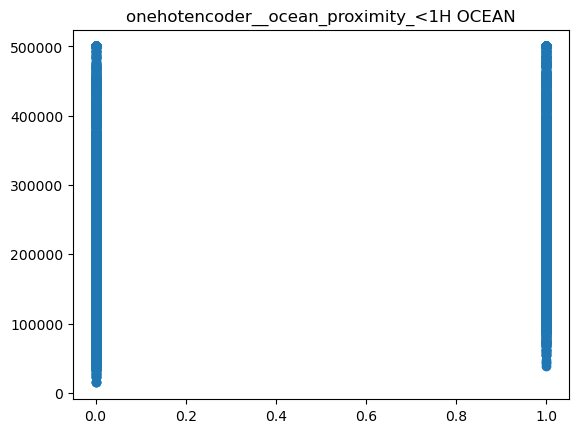

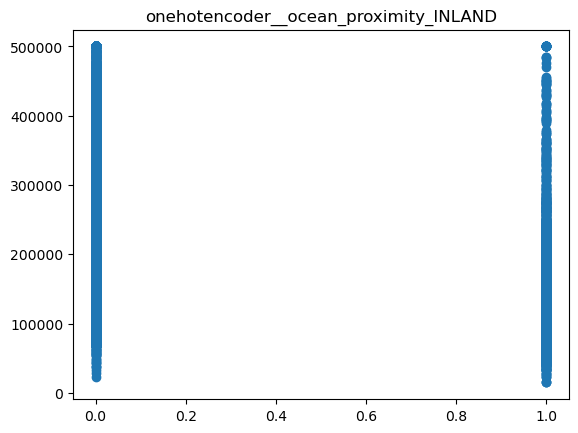

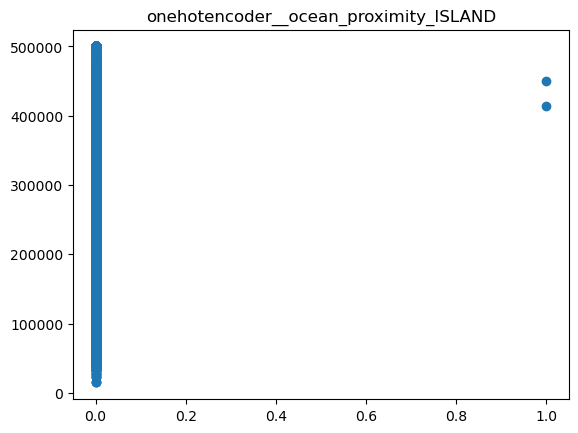

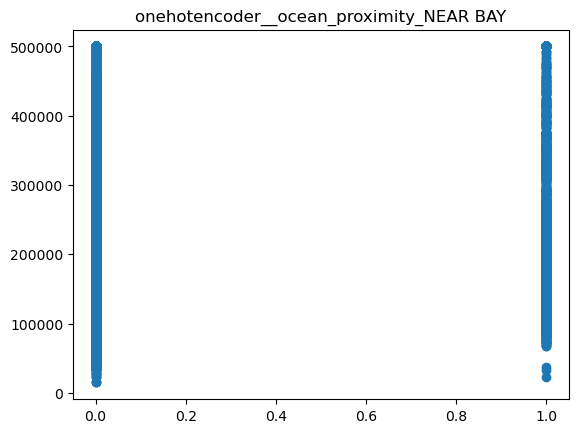

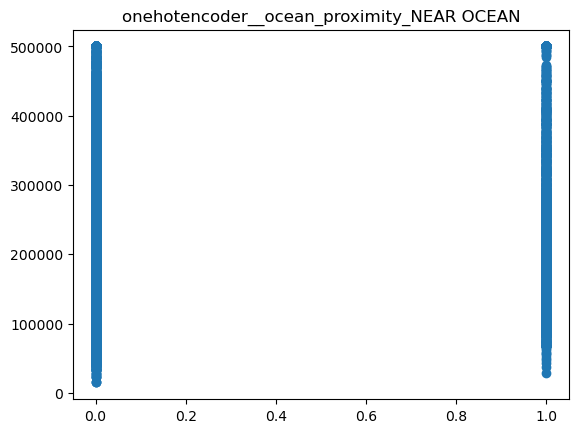

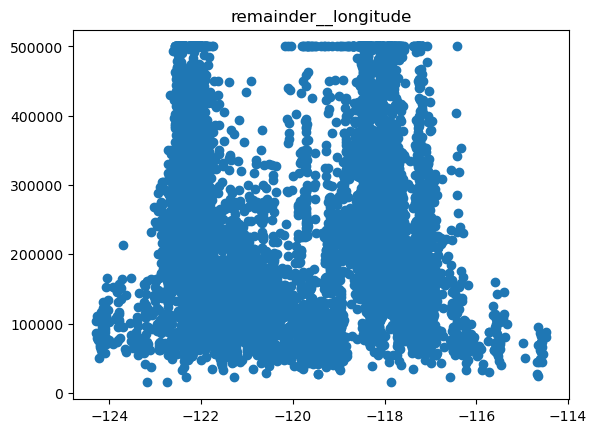

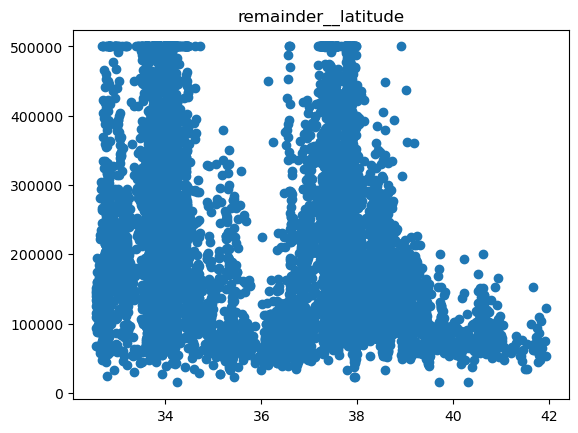

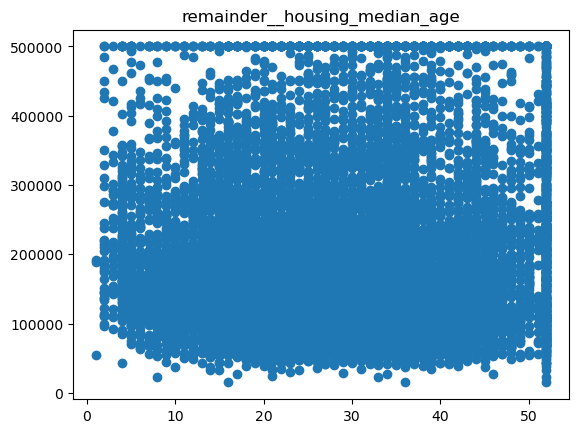

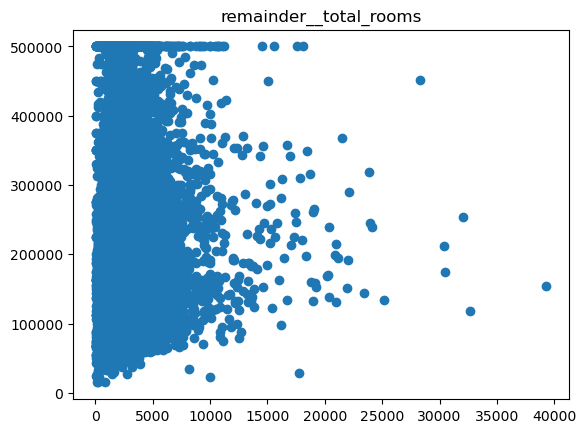

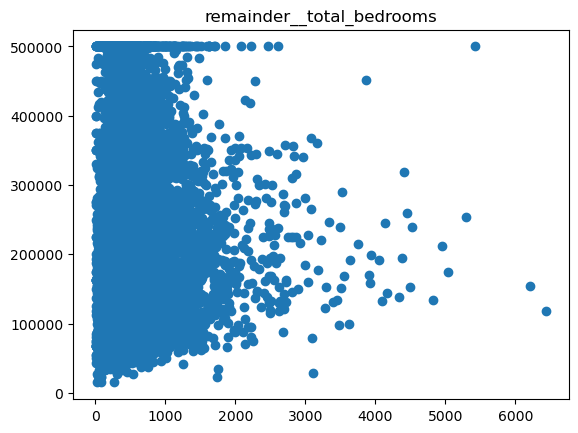

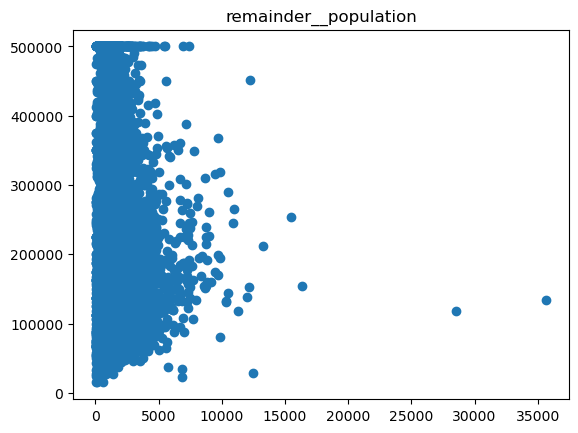

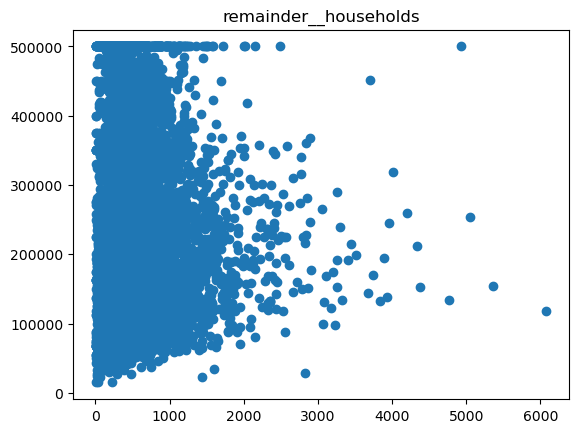

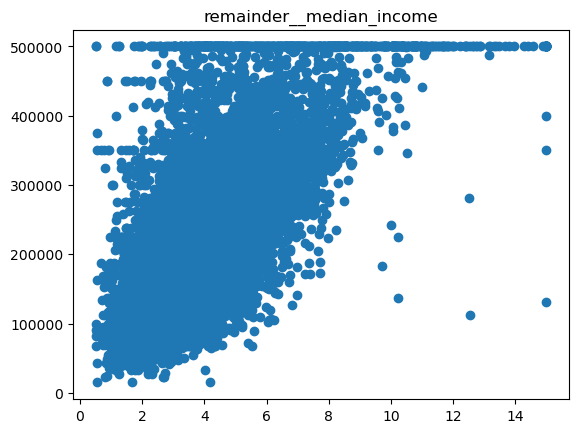

In [243]:
for c in X_train.columns:
    fig, ax = plt.subplots()
    ax.scatter(X_train[c], y_train)
    ax.set_title(c)
    plt.show()

In [16]:
# Generate all combinations of the feature set.
combs=[]
for n in range(1,X_train.columns.shape[0]):
    combs += list(itertools.combinations(X_train.columns, r=n))

In [22]:
d = {
    'Degree':[],
    'Combination':[],
    'Test_MSE':[],
    'Validation_MSE':[],
    'R^2':[]
}


# Sample entire space.
for c in combs:
    print(c)
    for n in range(1,6):
        mse = get_MSE(c,n)
        d['Test_MSE'].append(mse[0])
        d['Validation_MSE'].append(mse[1])
        d['Degree'].append(n)
        d['Combination'].append(c)
        d['R^2'].append(mse[-2])

('onehotencoder__ocean_proximity_<1H OCEAN',)
('onehotencoder__ocean_proximity_INLAND',)
('onehotencoder__ocean_proximity_ISLAND',)
('onehotencoder__ocean_proximity_NEAR BAY',)
('onehotencoder__ocean_proximity_NEAR OCEAN',)
('remainder__longitude',)
('remainder__latitude',)
('remainder__housing_median_age',)
('remainder__total_rooms',)
('remainder__total_bedrooms',)
('remainder__population',)
('remainder__households',)
('remainder__median_income',)
('onehotencoder__ocean_proximity_<1H OCEAN', 'onehotencoder__ocean_proximity_INLAND')
('onehotencoder__ocean_proximity_<1H OCEAN', 'onehotencoder__ocean_proximity_ISLAND')
('onehotencoder__ocean_proximity_<1H OCEAN', 'onehotencoder__ocean_proximity_NEAR BAY')
('onehotencoder__ocean_proximity_<1H OCEAN', 'onehotencoder__ocean_proximity_NEAR OCEAN')
('onehotencoder__ocean_proximity_<1H OCEAN', 'remainder__longitude')
('onehotencoder__ocean_proximity_<1H OCEAN', 'remainder__latitude')
('onehotencoder__ocean_proximity_<1H OCEAN', 'remainder__hou

KeyboardInterrupt: 

In [25]:
d = pd.DataFrame(d)
d['Combination_Degree'] = d['Combination'].agg(len)
d.sort_values('R^2')

,Degree,Combination,Test_MSE,Validation_MSE,R^2,Combination_Degree
3859,5,"(onehotencoder__ocean_proximity_ISLAND, onehot...",1.437759e+30,1.169331e+10,-1.092702e+20,4
3999,5,"(onehotencoder__ocean_proximity_ISLAND, onehot...",1.352659e+30,1.173413e+10,-1.028026e+20,4
3889,5,"(onehotencoder__ocean_proximity_ISLAND, onehot...",9.821575e+27,5.429406e+22,-7.464434e+17,4
4134,5,"(onehotencoder__ocean_proximity_ISLAND, remain...",5.108010e+27,6.026473e+21,-3.882107e+17,4
4184,5,"(onehotencoder__ocean_proximity_ISLAND, remain...",4.671850e+27,1.145819e+22,-3.550623e+17,4
...,...,...,...,...,...,...
40122,3,"(onehotencoder__ocean_proximity_<1H OCEAN, one...",3.371980e+09,3.380199e+09,7.437282e-01,10
37777,3,"(onehotencoder__ocean_proximity_<1H OCEAN, one...",3.367039e+09,3.412159e+09,7.441037e-01,9
39927,3,"(onehotencoder__ocean_proximity_<1H OCEAN, one...",3.356426e+09,3.365685e+09,7.449104e-01,10
40397,3,"(onehotencoder__ocean_proximity_INLAND, onehot...",3.349197e+09,3.343830e+09,7.454597e-01,10


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


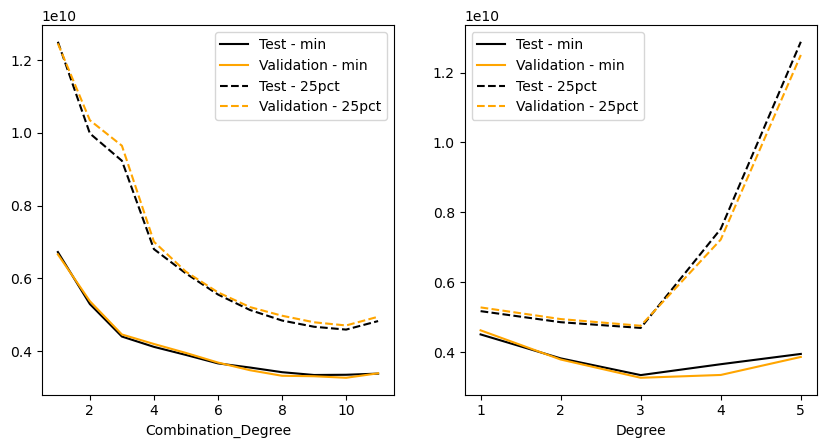

In [31]:
#px.violin(d, color='Combination_Degree', y=['Test_MSE', 'Validation_MSE'], log_y=True, range_y=(1e9, 1e10))
fig, ax = plt.subplots(1,2)

for i,x in enumerate(['Combination_Degree', 'Degree']):
    t=d.groupby(x).agg(min).reset_index()
    ax[i].plot(
        t[x], t['Test_MSE'], label='Test - min', color='black'
    )
    ax[i].plot(
        t[x], t['Validation_MSE'], label='Validation - min', color='orange'
    )

    t=d.groupby(x).agg(lambda x: np.quantile(x, 0.25)).reset_index()
    ax[i].plot(
        t[x], t['Test_MSE'], '--', label='Test - 25pct', color='black'
    )
    ax[i].plot(
        t[x], t['Validation_MSE'], '--', label='Validation - 25pct', color='orange'
    )
    ax[i].legend()
    ax[i].set_xlabel(x)

#ax[0].plot([10,10], [0.4, 1.2e10], '-.', color = 'red')
#ax[1].plot([3,3], [0.4,1.2e10], '-.', color='red')

fig.set_figwidth(10)

,Degree,Combination,Test_MSE,Validation_MSE,Combination_Degree
1237,3,"(longitude, latitude, housing_median_age, tota...",3.550640e+09,3.630782e+09,7
1247,3,"(longitude, latitude, housing_median_age, tota...",3.564703e+09,3.552548e+09,7
1267,3,"(latitude, housing_median_age, total_rooms, to...",3.862935e+09,4.212954e+09,7
1262,3,"(longitude, housing_median_age, total_rooms, t...",3.888957e+09,4.005327e+09,7
1252,3,"(longitude, latitude, housing_median_age, tota...",3.902127e+09,3.912044e+09,7
1257,3,"(longitude, latitude, total_rooms, total_bedro...",3.922067e+09,3.981402e+09,7
1242,3,"(longitude, latitude, housing_median_age, tota...",4.050466e+09,4.216272e+09,7
1232,3,"(longitude, latitude, housing_median_age, tota...",5.534768e+09,5.865325e+09,7


In [50]:
top = d.query('Combination_Degree == 10 & Degree == 3').sort_values('Test_MSE')
top

,Degree,Combination,Test_MSE,Validation_MSE,R^2,Combination_Degree
40397,3,"(onehotencoder__ocean_proximity_INLAND, onehot...",3.349197e+09,3.343830e+09,0.745460,10
39927,3,"(onehotencoder__ocean_proximity_<1H OCEAN, one...",3.356426e+09,3.365685e+09,0.744910,10
40122,3,"(onehotencoder__ocean_proximity_<1H OCEAN, one...",3.371980e+09,3.380199e+09,0.743728,10
40407,3,"(onehotencoder__ocean_proximity_INLAND, onehot...",3.387679e+09,3.266315e+09,0.742535,10
39812,3,"(onehotencoder__ocean_proximity_<1H OCEAN, one...",3.389813e+09,3.375194e+09,0.742373,10
...,...,...,...,...,...,...
39762,3,"(onehotencoder__ocean_proximity_<1H OCEAN, one...",6.428283e+13,1.126367e+14,-4884.519338,10
39097,3,"(onehotencoder__ocean_proximity_<1H OCEAN, one...",1.696446e+14,8.277680e+13,-12892.049766,10
39197,3,"(onehotencoder__ocean_proximity_<1H OCEAN, one...",2.643119e+14,4.731581e+14,-20086.804015,10
39157,3,"(onehotencoder__ocean_proximity_<1H OCEAN, one...",6.650200e+14,2.979546e+15,-50540.768075,10


In [35]:
mse = get_MSE(top['Combination'],3) 

In [37]:
p = mse[-1]

Pipeline(steps=[('tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('polynomialfeatures',
                                                  PolynomialFeatures(degree=3,
                                                                     include_bias=False),
                                                  ('onehotencoder__ocean_proximity_INLAND',
                                                   'onehotencoder__ocean_proximity_NEAR '
                                                   'BAY',
                                                   'onehotencoder__ocean_proximity_NEAR '
                                                   'OCEAN',
                                                   'remainder__longitude',
                                                   'remainder__latitude',
                                                   'remainder__housing_median_age',
                                                   'r

In [49]:
p.score(X_val, y_val)

0.49743027654322436

In [45]:
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{top['Combination'][i]:<8}"
            f"{r.importances_mean[i]:.3f}"
            f" +/- {r.importances_std[i]:.3f}")

IndexError: tuple index out of range

In [57]:
sm_lo = -122.3
sm_la = 37.6

prox = []
for i in range(len(cali)):
    lo = cali.iloc[i].remainder__longitude
    la = cali.iloc[i].remainder__latitude
    prox.append(np.sqrt( (lo-sm_lo)**2 + (la-sm_la)**2 ))

cali['Proximity_To_Bay_Area'] = np.array(prox)

In [87]:
cali.corr()

,onehotencoder__ocean_proximity_<1H OCEAN,onehotencoder__ocean_proximity_INLAND,onehotencoder__ocean_proximity_ISLAND,onehotencoder__ocean_proximity_NEAR BAY,onehotencoder__ocean_proximity_NEAR OCEAN,remainder__longitude,remainder__latitude,remainder__housing_median_age,remainder__total_rooms,remainder__total_bedrooms,remainder__population,remainder__households,remainder__median_income,remainder__median_house_value,Proximity_To_Bay_Area,Cluster
onehotencoder__ocean_proximity_<1H OCEAN,1.000000,-0.607778,-0.013928,-0.314721,-0.342018,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614,0.355902,-0.296548
onehotencoder__ocean_proximity_INLAND,-0.607778,1.000000,-0.010681,-0.241356,-0.262289,-0.055337,0.351084,-0.236968,0.026477,-0.006463,-0.019602,-0.038265,-0.237536,-0.484787,-0.123862,0.439476
onehotencoder__ocean_proximity_ISLAND,-0.013928,-0.010681,1.000000,-0.005531,-0.006011,0.009501,-0.016662,0.017105,-0.007603,-0.004361,-0.010451,-0.009119,-0.009281,0.023525,0.013239,-0.009129
onehotencoder__ocean_proximity_NEAR BAY,-0.314721,-0.241356,-0.005531,1.000000,-0.135819,-0.474714,0.358785,0.256149,-0.023647,-0.019873,-0.061480,-0.011280,0.056677,0.160526,-0.507010,-0.094470
onehotencoder__ocean_proximity_NEAR OCEAN,-0.342018,-0.262289,-0.006011,-0.135819,1.000000,0.046185,-0.161342,0.020797,-0.008674,0.000679,-0.023498,0.002106,0.027351,0.140378,0.119616,-0.082271
remainder__longitude,0.320831,-0.055337,0.009501,-0.474714,0.046185,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.957453,0.023217
remainder__latitude,-0.446928,0.351084,-0.016662,0.358785,-0.161342,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.887679,0.139046
remainder__housing_median_age,0.045553,-0.236968,0.017105,0.256149,0.020797,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,-0.105711,-0.030204
remainder__total_rooms,-0.003777,0.026477,-0.007603,-0.023647,-0.008674,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,0.034447,-0.110874
remainder__total_bedrooms,0.018314,-0.006463,-0.004361,-0.019873,0.000679,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.061888,-0.075456
